In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("Hotel_Reviews.csv")

In [5]:
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [6]:
for i in data.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


In [7]:
len(data.Hotel_Name.unique())

1492

In [93]:
data.Reviewer_Nationality.describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

In [92]:
Reviewer_Nat_Count = data.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64


In [8]:
import matplotlib.pylab as plt
%matplotlib inline
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import seaborn as sns

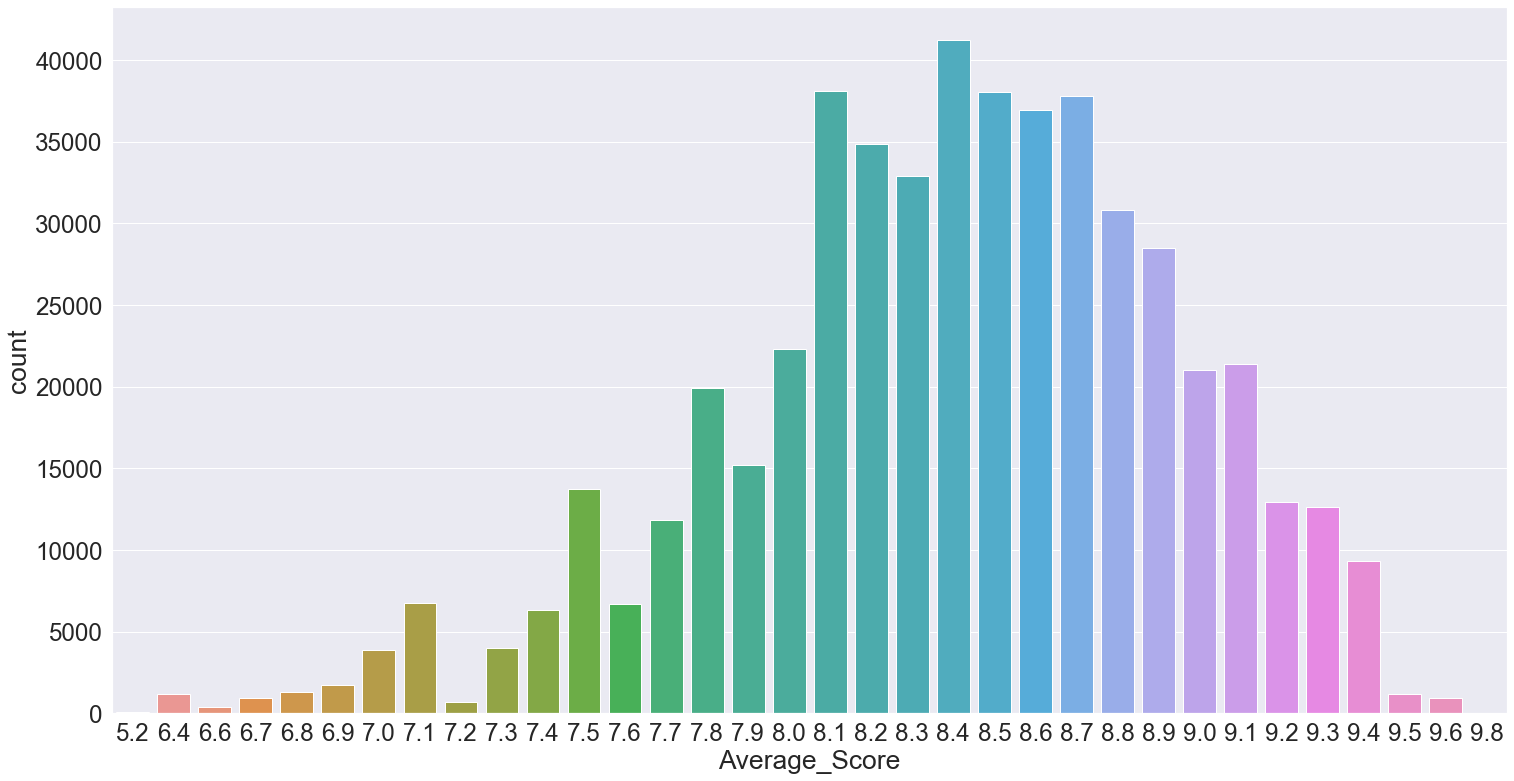

In [122]:
data_plot = data[["Hotel_Name","Average_Score"]]

sns.set(font_scale = 2.2)
a4_dims = (25,13)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

In [79]:
text = ""
for i in range(data.shape[0]):
    text = " ".join([text,data["Reviewer_Nationality"].values[i]])

KeyboardInterrupt: 

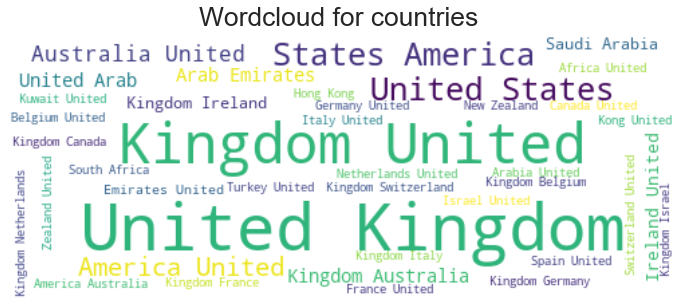

In [110]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 500,\
                      height=200, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=312)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

In [95]:
data.Review_Date.describe()

count       515738
unique         731
top       8/2/2017
freq          2585
Name: Review_Date, dtype: object

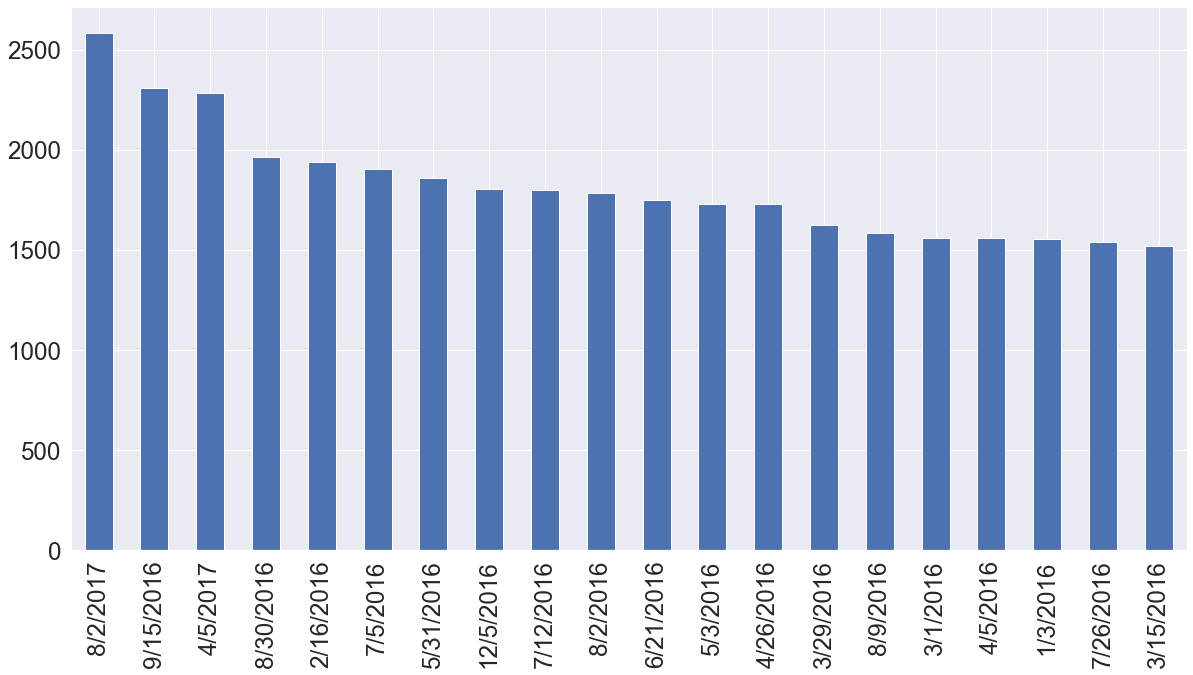

In [111]:
Review_Date_count = data.Review_Date.value_counts()
plt.figure(figsize=(20,10))
Review_Date_count[:20].plot(kind='bar')

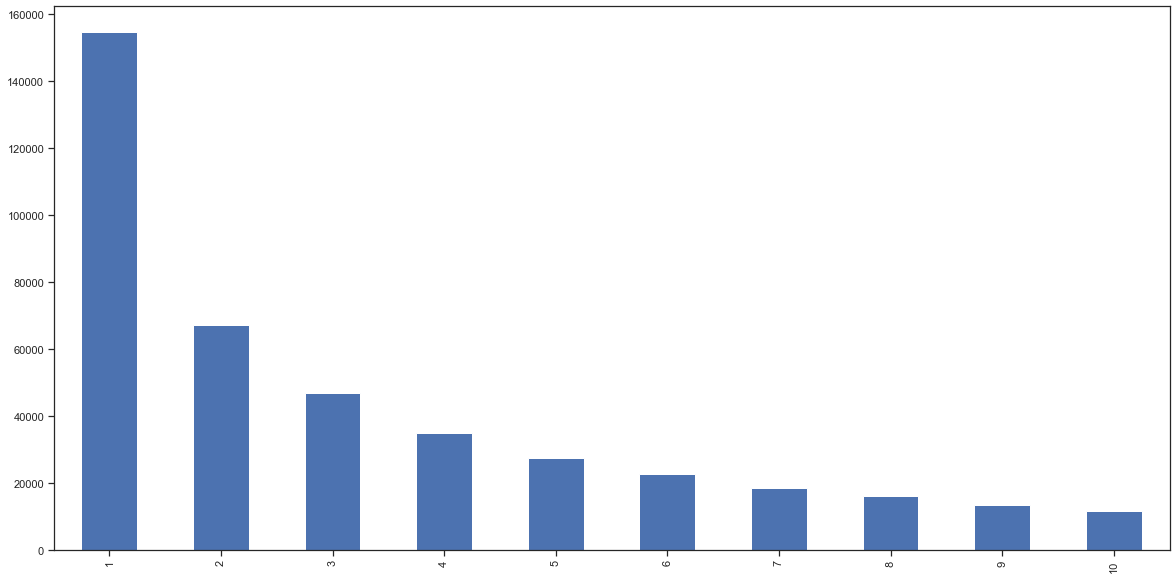

In [158]:
Reviewers_freq = data.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
plt.figure(figsize=(20,10))
Reviewers_freq[0:10].plot(kind='bar',title='')

In [128]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
plotCorrelationMatrix(data["Average_Score"], 8)

NameError: name 'plotCorrelationMatrix' is not defined

In [134]:
data['Average_Score'].corr(data['Reviewer_Score'])

0.36435082685489584

In [135]:
data.corr()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Additional_Number_of_Scoring,1.000000,-0.152846,0.029195,0.824884,-0.053087,-0.071969,-0.061554,0.336295,-0.295732
Average_Score,-0.152846,1.000000,-0.112323,-0.179568,0.106719,0.036454,0.364351,-0.108642,0.106078
Review_Total_Negative_Word_Counts,0.029195,-0.112323,1.000000,0.035124,0.119613,0.003199,-0.382474,0.019112,-0.020002
Total_Number_of_Reviews,0.824884,-0.179568,0.035124,1.000000,-0.030132,-0.024910,-0.072865,0.100295,-0.014141
Review_Total_Positive_Word_Counts,-0.053087,0.106719,0.119613,-0.030132,1.000000,0.026535,0.220800,-0.037567,0.035471
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071969,0.036454,0.003199,-0.024910,0.026535,1.000000,0.002873,-0.059793,0.110810
Reviewer_Score,-0.061554,0.364351,-0.382474,-0.072865,0.220800,0.002873,1.000000,-0.036562,0.034001
lat,0.336295,-0.108642,0.019112,0.100295,-0.037567,-0.059793,-0.036562,1.000000,-0.304524
lng,-0.295732,0.106078,-0.020002,-0.014141,0.035471,0.110810,0.034001,-0.304524,1.000000


In [138]:
review_data = data[['Hotel_Name', 'Positive_Review', 'Negative_Review', 'Average_Score', 'Reviewer_Score']].copy()
review_data.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7


In [139]:
review_data['review_text'] = review_data['Positive_Review'].astype(str) + review_data['Negative_Review'].astype(str)

In [140]:
review_data.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

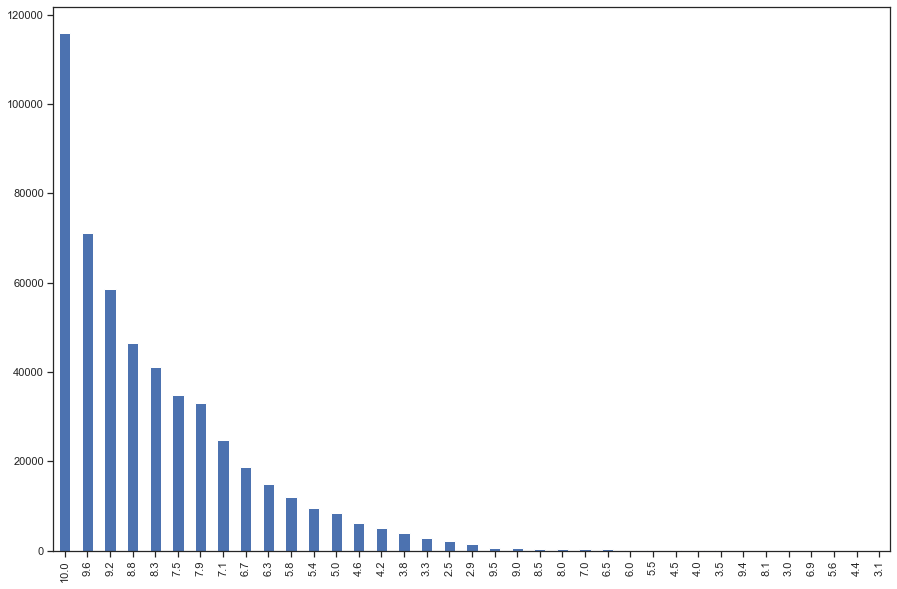

In [155]:
review_data['review_text'] = review_data['review_text'].fillna('')
review_data.Reviewer_Score.value_counts()
review_data.Reviewer_Score.value_counts().plot(kind='bar',figsize=(15,10))

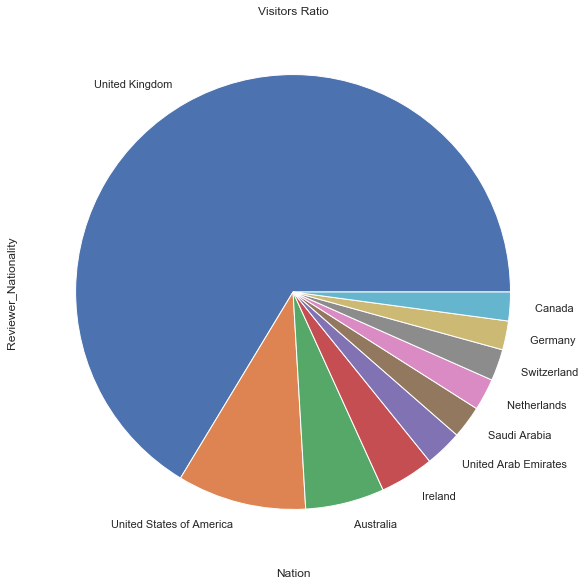

In [173]:
Length = len(data.Reviewer_Nationality)
result=(data.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)
result
plt.xlabel('Nation')
plt.ylabel('Percentage of people visiting')
plt.title('Visitors Ratio')
result.head(10).plot(kind='pie',figsize=(20,10))
plt.show()

In [208]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
tokenized_text=sent_tokenize(data['Positive_Review'])

TypeError: expected string or bytes-like object

In [224]:
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
review_data['review_text'] = review_data['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
review_data['review_text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    park outside hotel beautiful angry made post a...
1    real complaints hotel great great location sur...
2    location good staff ok cute hotel breakfast ra...
3    great location nice surroundings bar restauran...
4    amazing location building romantic setting boo...
Name: review_text, dtype: object

In [219]:
review_data['stopwords'] = review_data['review_text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
print(review_data[['review_text','stopwords']].head())
review_data['numerics'] = review_data['review_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(review_data[['review_text','numerics']].head())
review_data['hastags'] = review_data['review_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
print(review_data[['review_text','hastags']].head())

                                         review_text  stopwords
0   Only the park outside of the hotel was beauti...        201
1   No real complaints the hotel was great great ...         39
2   Location was good and staff were ok It is cut...         23
3   Great location in nice surroundings the bar a...        102
4   Amazing location and building Romantic settin...         70
                                         review_text  numerics
0   Only the park outside of the hotel was beauti...        11
1   No real complaints the hotel was great great ...         0
2   Location was good and staff were ok It is cut...         0
3   Great location in nice surroundings the bar a...         0
4   Amazing location and building Romantic settin...         0
                                         review_text  hastags
0   Only the park outside of the hotel was beauti...        0
1   No real complaints the hotel was great great ...        0
2   Location was good and staff were ok It is cut...

In [220]:
review_data['review_text'] = review_data['review_text'].str.replace('[^\w\s]','')
review_data['review_text'] = review_data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [213]:
review_text

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text,stopwords,numerics
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...,201,11
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...,39,0
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...,23,0
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...,102,0
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...,70,0
...,...,...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,8.1,7.0,location no trolly or staff to help you take ...,7,0
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,8.1,5.8,Breakfast was ok and we got earlier check in ...,6,2
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,8.1,2.5,No Positive The ac was useless It was a hot we...,8,0
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,8.1,8.8,The rooms are enormous and really comfortable...,10,1


In [225]:
#commond words removal
freq = pd.Series(' '.join(review_data['review_text']).split()).value_counts()[:10]
freq

room         315312
staff        230017
location     199233
hotel        198489
breakfast    141248
good         132294
negative     129683
great        115031
friendly      89262
helpful       79314
dtype: int64

In [226]:
freq = list(freq.index)
review_data['review_text'] = review_data['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
review_data['review_text'].head()

0    park outside beautiful angry made post availab...
1    real complaints surroundings rooms amenities s...
2    ok cute range nice go back rooms nice elderly ...
3    nice surroundings bar restaurant nice lovely o...
4    amazing building romantic setting booked compa...
Name: review_text, dtype: object

In [233]:
from textblob import TextBlob
review_data['review_text'] =review_data['review_text'][:5].apply(lambda x: str(TextBlob(x).correct()))
review_data['review_text'] 


0         park outside beautiful angry made post availab...
1         real complaints surroundings rooms amenities s...
2         ok cut range nice go back rooms nice elderly b...
3         nice surroundings bar restaurant nice lovely o...
4         amazing building romantic setting booked compa...
                                ...                        
515733                                                  NaN
515734                                                  NaN
515735                                                  NaN
515736                                                  NaN
515737                                                  NaN
Name: review_text, Length: 515738, dtype: object

In [ ]:
tf1 = (review_data['review_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']